### OBJECTIVE
The main objective of this work is to predict if a patient is at risk of having heart disease or not, based on the common features of patients with heart disease.

### DATA USED:
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets with a total of 918 observations are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The features are as the following:

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]


### CODE:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/Users/aakashdeorukhkar/Desktop/Python/DataSets/heart.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.isnull().sum() #Checking for null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no null values in the data.

In [6]:
data.nunique()  #We get total unique values in each column

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

## Seperating the numerical and categorical features:

In [7]:
numeric_features = [i for i in data.columns if data[i].nunique() > 10]
categorical_features = [i for i in data.columns if data[i].nunique() < 10]

In [8]:
print("Numeric features:{}".format(numeric_features))
print("Categorical features:{}".format(categorical_features))

Numeric features:['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Categorical features:['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']


## Visualizing a count plot for each categorical feature with a hue of output variable

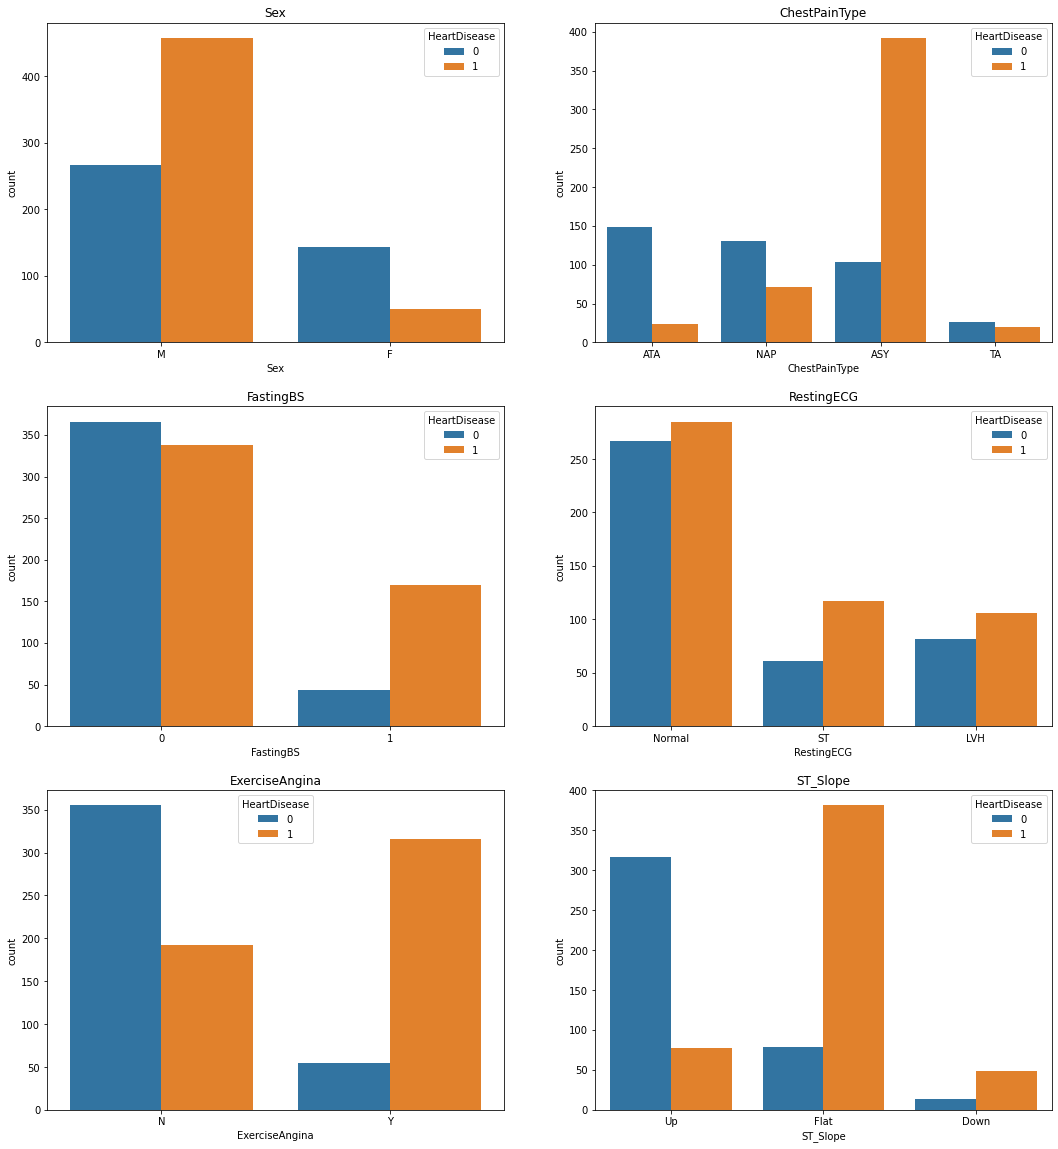

In [9]:
i = 1
plt.figure(figsize=(18,20))  #Setting the plot size
for features in categorical_features[:-1]:  #for each feature in categorical_features -1 (HeartDisease is excluded)
    plt.subplot(3,2,i)  #Creating a subplot
    sns.countplot(x=data[features], hue=data.HeartDisease).set_title(features)  #x is feature of countplot 
    i=i+1
plt.show()

## Visualizing all numeric values with output variable

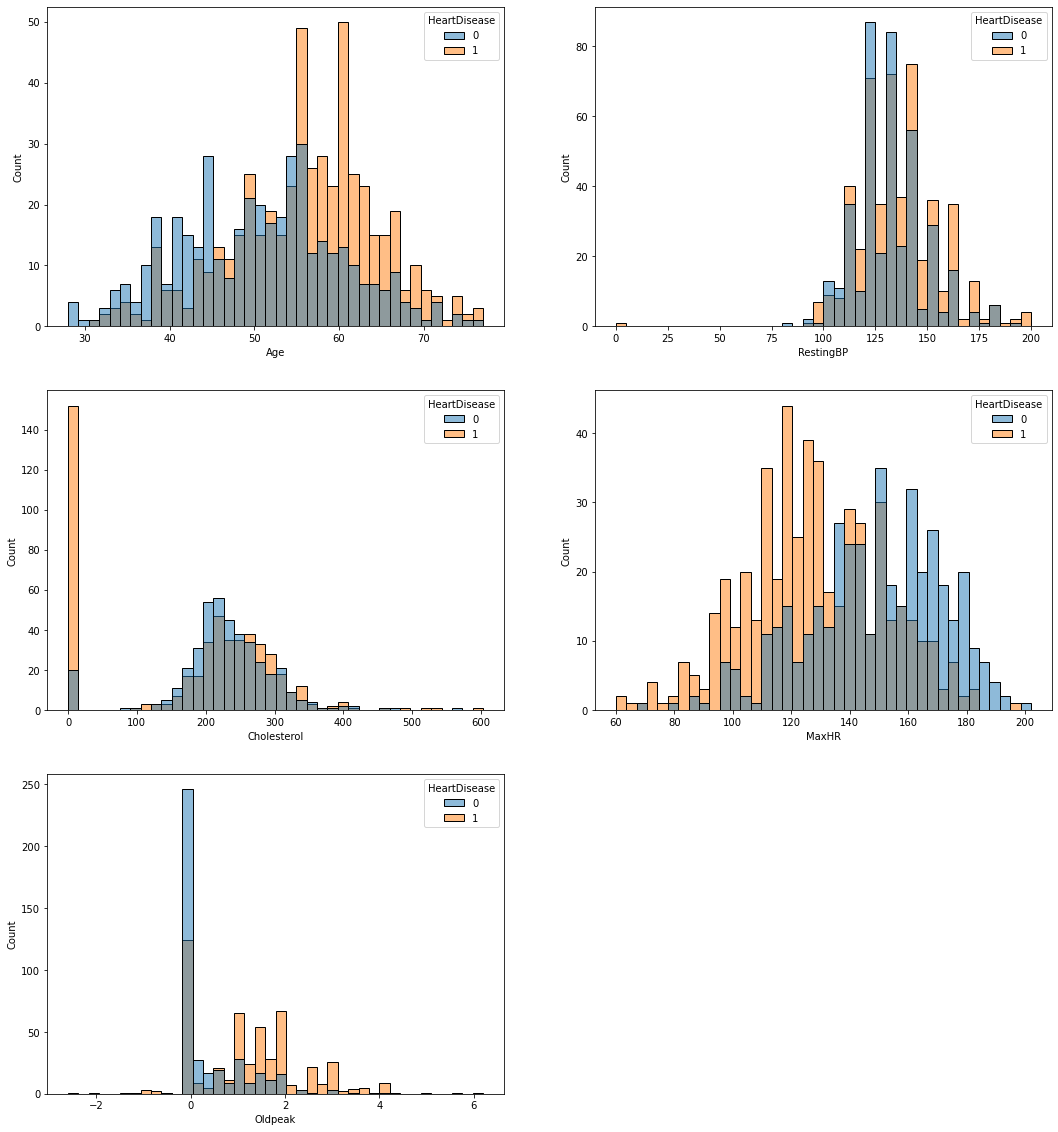

In [10]:
plt.figure(figsize=(18,20))
i=1
for features in numeric_features:
    plt.subplot(3,2,i)
    sns.histplot(x=data[features],hue=data.HeartDisease,bins=40)
    i = i+1
plt.show()
    

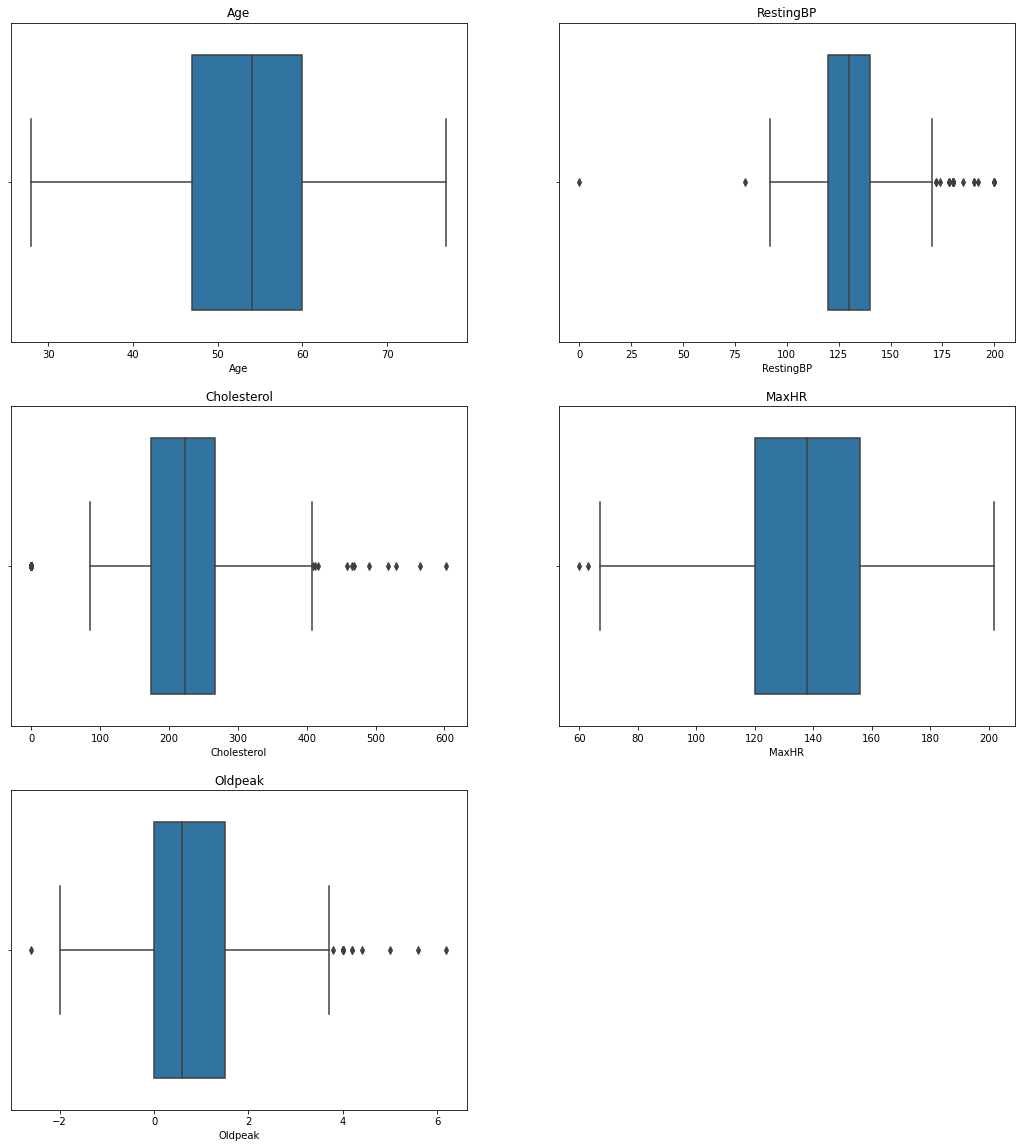

In [11]:
plt.figure(figsize=(18,20))
i = 1
for features in numeric_features:
    plt.subplot(3,2,i)
    sns.boxplot(x=data[features]).set_title(features)
    i=i+1
plt.show()

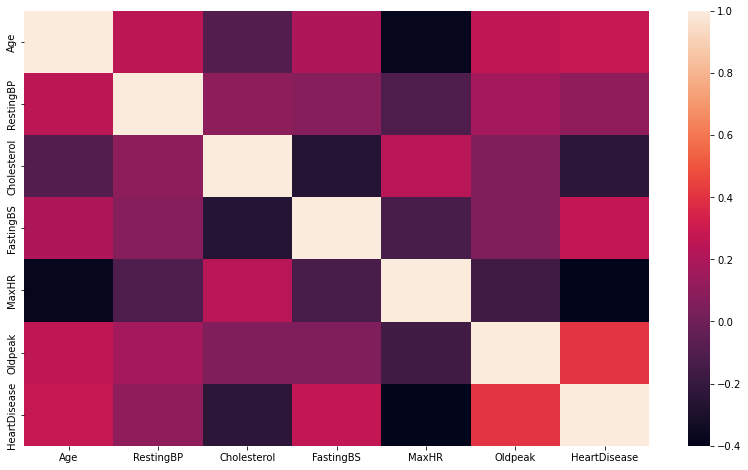

In [12]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr())
plt.show()

### We can observe negative correlation between 'Age' and 'MaxHR' i.e younger people have higher heart rate compared to old people
### 'HeartDisease' and 'Oldpeak' have a positive correlation


In [13]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
categorical_features

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

### We need to LabelConvert categorical variables

In [15]:
from sklearn.preprocessing import LabelEncoder
df = data.copy()
label = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']  #Identify all values that need processing
for i in label:
    le = LabelEncoder()
    df[i]=le.fit_transform(df[i])   #Replace existing rows with Label encoded rows

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


### Now we split data into dependent and independent variables

In [17]:
X = df.drop("HeartDisease",axis=1)
y = df["HeartDisease"]

In [18]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


### Feature Scaling:

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()
X_ = X.copy()
X_.loc[:,numeric_features] = sc.fit_transform(X_.loc[:,numeric_features])


In [21]:
X_.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,-0.832432,2
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.105664,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,-0.832432,2
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.574711,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,-0.832432,2


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_,y,test_size = 0.2, random_state=42)

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

## PREDICTIVE MODELS

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
classifier = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
rec = recall_score(y_test,y_pred)*100

print('Model Accuracy is:{}'.format(round((acc),2)))
print('Recall Score is:{}'.format(round((rec),2)))
print(classification_report(y_test,y_pred))



Model Accuracy is:84.24
Recall Score is:81.31
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



<AxesSubplot:>

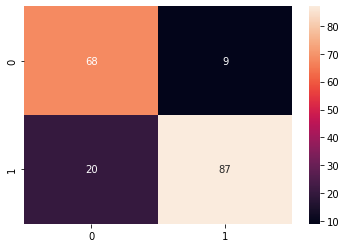

In [25]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000,random_state=0)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

<AxesSubplot:>

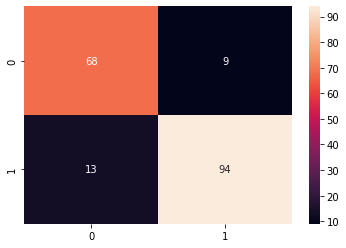

In [27]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [28]:
acc = accuracy_score(y_test,y_pred)*100
rec = recall_score(y_test,y_pred)*100
print('Model Accuracy is:{}'.format(round((acc),2)))
print('Recall Score is:{}'.format(round((rec),2)))
print(classification_report(y_test,y_pred))

Model Accuracy is:88.04
Recall Score is:87.85
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



### KNN

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −

Lazy learning algorithm − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.

Non-parametric learning algorithm − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

We need to select optimal K value

Lets Fit the model to different k values

In [33]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Lets analyze the error rate

Text(0, 0.5, 'Error rate')

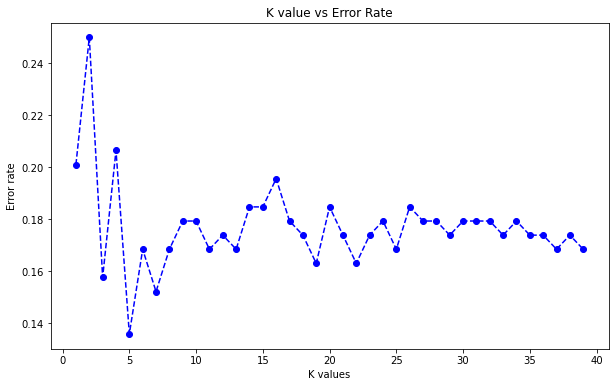

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",linestyle="dashed",marker='o')
plt.title("K value vs Error Rate")
plt.xlabel("K values")
plt.ylabel("Error rate")

Lets fit the KNN again with new K values

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred_y = knn.predict(X_test)

In [60]:
acc = accuracy_score(y_test,pred_y)*100
rec = recall_score(y_test,pred_y)*100
print('Model Accuracy is:{}'.format(round((acc),2)))
print('Recall Score is:{}'.format(round((rec),2)))

Model Accuracy is:86.41
Recall Score is:82.24


In [61]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        77
           1       0.94      0.82      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.87       184



Text(33.0, 0.5, 'Actual')

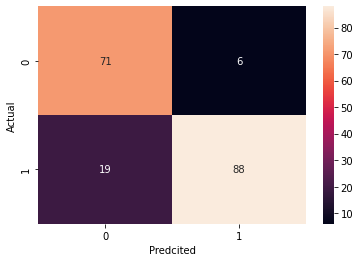

In [63]:
cm = confusion_matrix(y_test,pred_y)
sns.heatmap(cm,annot=True)
plt.xlabel("Predcited")
plt.ylabel("Actual")

## Conclusion:
#### Logistic Regression
Model Accuracy is:84.24%

Recall Score is:81.31%
#### Random Forest Classifier
Model Accuracy is:88.04%

Recall Score is:87.85%
#### KNN
Model Accuracy is:86.41%

Recall Score is:82.24%

All three Models perform well however the overall performance of Random Forest Classifier is better. Thus, Random Forest Classifier model can be used for predicting whether a pa  provided the features and other information of transaction is unbias and not manipulated.